In [124]:
#Session 3 Assignment

In [125]:
#Exercise 3 (p.198, Chap.5)

In [126]:
#a.
#The k-fold cross validation has a single parameter called k that refers to the number of groups that a given 
#data sample is to be split into.When a specific value for k is chosen, 
#it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. 
#each time 1 fold is considered as a validation set and mean square is computed on the rest all. 

In [127]:
#b. i.
#K- fold is complex and more slower. So, for slower data, k-fold is better than validation set.
#b. ii.
#LOOCV should not be used when we have a very large dataset or a computationally expensive model to evaluate. 
#It is good for smaller data.

In [128]:
#Exercise 8 (p.200, Chap.5)

In [129]:
#a.
set.seed(1)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

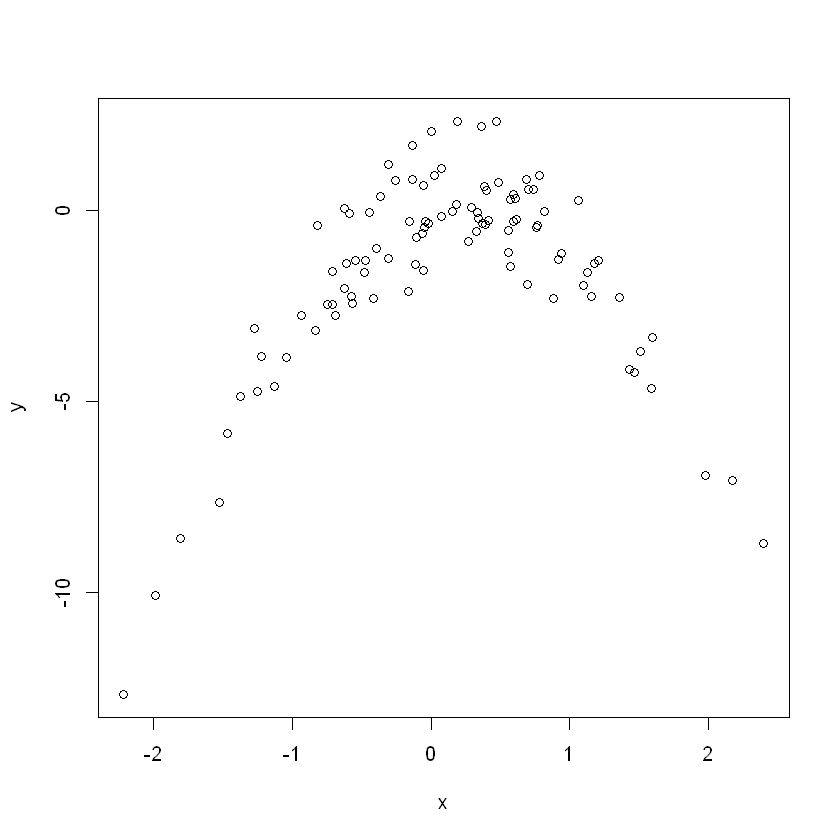

In [130]:
#b.
plot(x, y)

In [131]:
#part c
library(boot) 
data<-data.frame(x,y)
loocvError<-list()

set.seed(613)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    result<- cv.glm(data, model)
    loocvError[i]<-result$delta[1]
}

loocv_error

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

In [132]:
#part d
data<-data.frame(x,y)
loocvError<-list()

set.seed(123)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    result<- cv.glm(data, model)
    loocvError[i]<-result$delta[1]
}

loocv_error

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

In [133]:
#part f

data<-data.frame(x,y)
loocvError<-list()

set.seed(613)
for (i in 1:4) {
    model<- glm(y ∼ poly(x, i), data=data)
    print(summary(model))
    result<- cv.glm(data, model)
    
    loocvError[i]<-result$delta[1]
}



Call:
glm(formula = y ~ poly(x, i), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.550      0.260  -5.961 3.95e-08 ***
poly(x, i)     6.189      2.600   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


Call:
glm(formula = y ~ poly(x, i), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, i)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, i)2 -23.9483     0.9580 

In [134]:
loocvError

[[1]]
[1] 7.288162

[[2]]
[1] 0.9374236

[[3]]
[1] 0.9566218

[[4]]
[1] 0.9539049

In [135]:
#the results are exact same as in above parts

In [136]:
#Exercise 1 (p.259, Chap.6)
#a. the model that have K = p will have the smallest RSS

#b. subset selection seems to be better because it considers more combination of factors

#c. i.TRUE , ii. TRUE , iii. FALSE , iv. FALSE , v. FALSE

In [137]:
#Exercise 9 (p.263, Chap.6)

In [138]:
library(ISLR)
str(College$Private)

 Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...


In [139]:
college<-College
college$Private <- as.numeric(college$Private=='Yes')
str(college$Private)

 num [1:777] 1 1 1 1 1 1 1 1 1 1 ...


In [140]:
#a.
set.seed(123)
#seting the row index
index <- sample(1:nrow(college), round(0.5 * nrow(college), 0))
#spliting data based on the index
train <- college[index, ]
test <- college[-index, ]

In [141]:
#b.
linear <- lm(Apps ~ ., data=train)
predict_lr <- predict(linear, newdata=test)
mse <- mean((predict_lr - test$Apps)^2)
print(mse)

[1] 1373995


In [142]:
library(dplyr)
selected_columns=colnames(train%>%select(-Apps))
selected_columns

ERROR: Error in select(., -Apps): unused argument (-Apps)


[1] "optimum lambda = 324.923105399109"


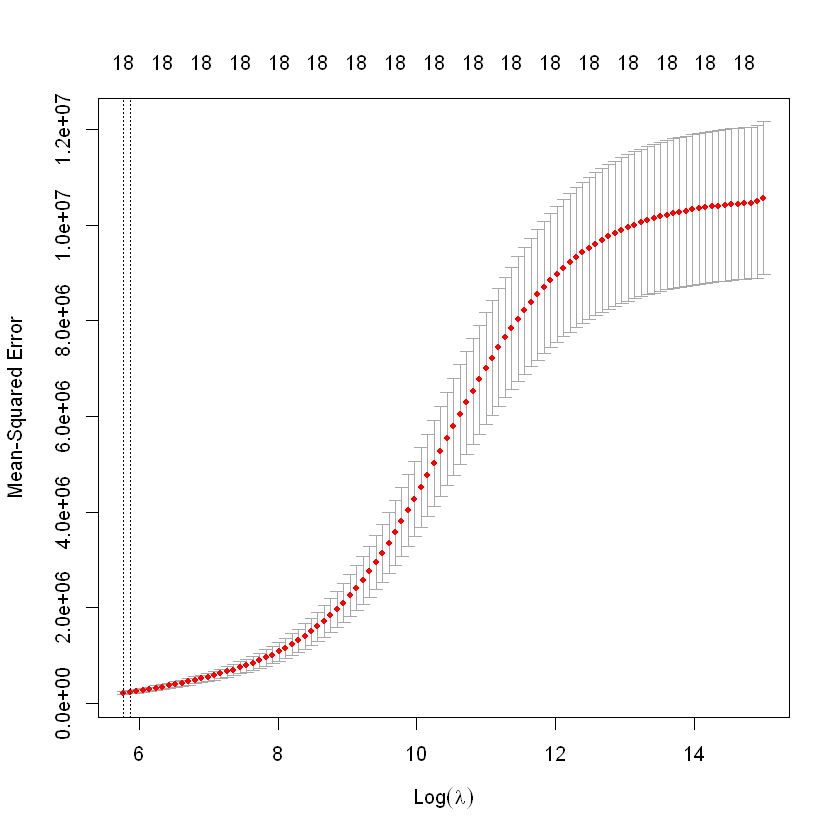

In [144]:
library(glmnet)
#part c
#finding lambda
model_lambda <- cv.glmnet(as.matrix(train[, selected_columns]), train$Apps, alpha=0)
plot(model_lambda)
print(paste('optimum lambda =', model_lambda$lambda.min))

In [147]:
best_lambda <- model_lambda$lambda.min
optimum_lambda <- glmnet(as.matrix(train[, selected_columns]), train$Apps, alpha=0)
predict_ol <- predict(best_lambda, s=model_lambda$lambda.min, newx=as.matrix(test[, selected_columns]))
MSE_lambda <- mean((predict_ol - test$Apps)^2)
MSE_lambda

[1] "optimum lambda = 94.7168088570262"


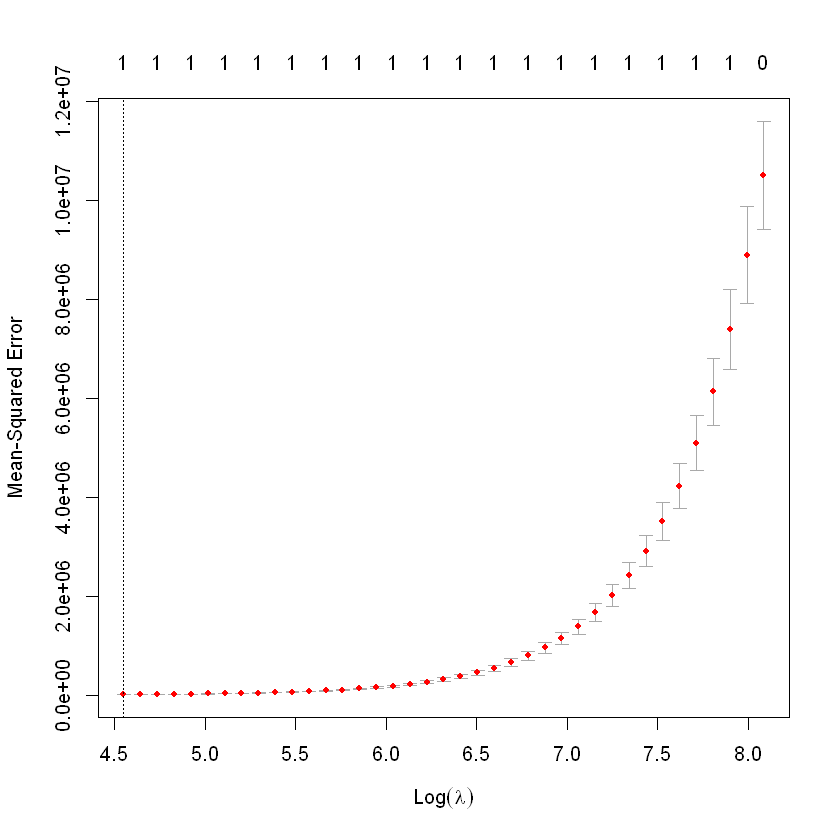

In [148]:
#part d
model_lambda_2 <- cv.glmnet(as.matrix(train[, selected_columns]), train$Apps, alpha=1)
plot(model_lambda_2) 
print(paste('optimum lambda =', model_lambda_2$lambda.min))

In [149]:
optimum_lambda_2 <- glmnet(as.matrix(train[, selected_columns]), train$Apps, alpha=1)
predict_ol_2 <- predict(optimum_lambda_2, s=model_lambda_2$lambda.min, newx=as.matrix(test[, selected_columns]))
MSE_lambda_2 <- mean((predict_ol_2 - test$Apps)^2)
MSE_lambda_2

[1] 16459.32

In [150]:
predict(optimum_lambda_2, type='coefficients', s=model_lambda_2$lambda.min)

19 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 84.5837960
Private      .        
Apps         0.9708495
Accept       .        
Enroll       .        
Top10perc    .        
Top25perc    .        
F.Undergrad  .        
P.Undergrad  .        
Outstate     .        
Room.Board   .        
Books        .        
Personal     .        
PhD          .        
Terminal     .        
S.F.Ratio    .        
perc.alumni  .        
Expend       .        
Grad.Rate    .        

[1] 1373995

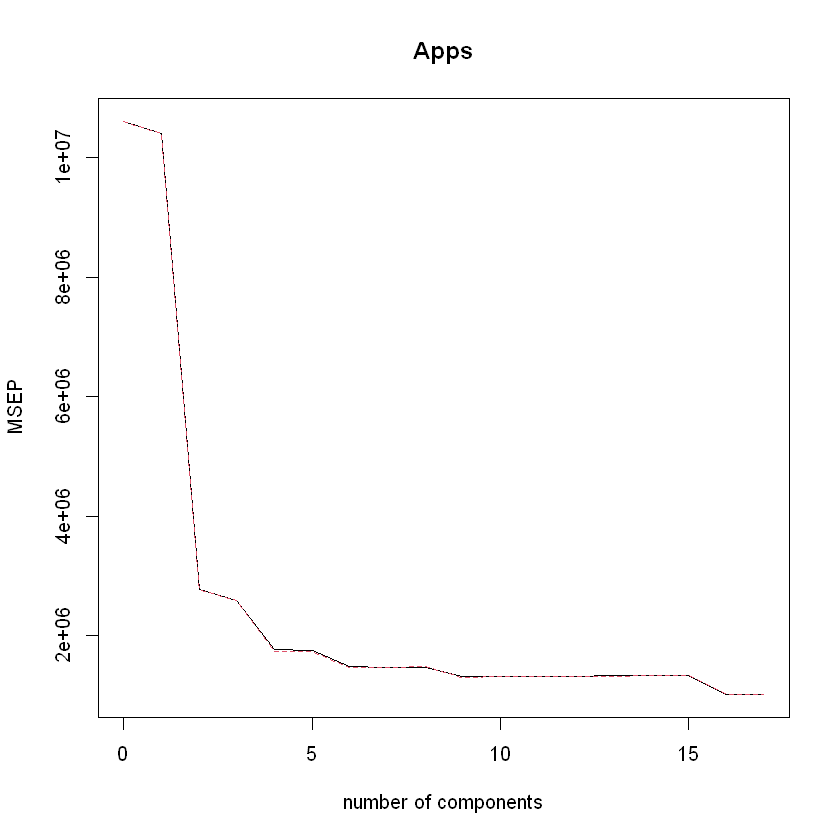

In [151]:
#part e
library(pls) 
model_pcr <- pcr(Apps ~ ., data=train, scale=TRUE, validation='CV')
validationplot(model_pcr, val.type='MSEP')
pred_pcr <- predict(model_pcr, newdata=test, ncomp=17)
MSE_pcr <- mean((pred_pcr - test$Apps)^2)
MSE_pcr

[1] 1458481

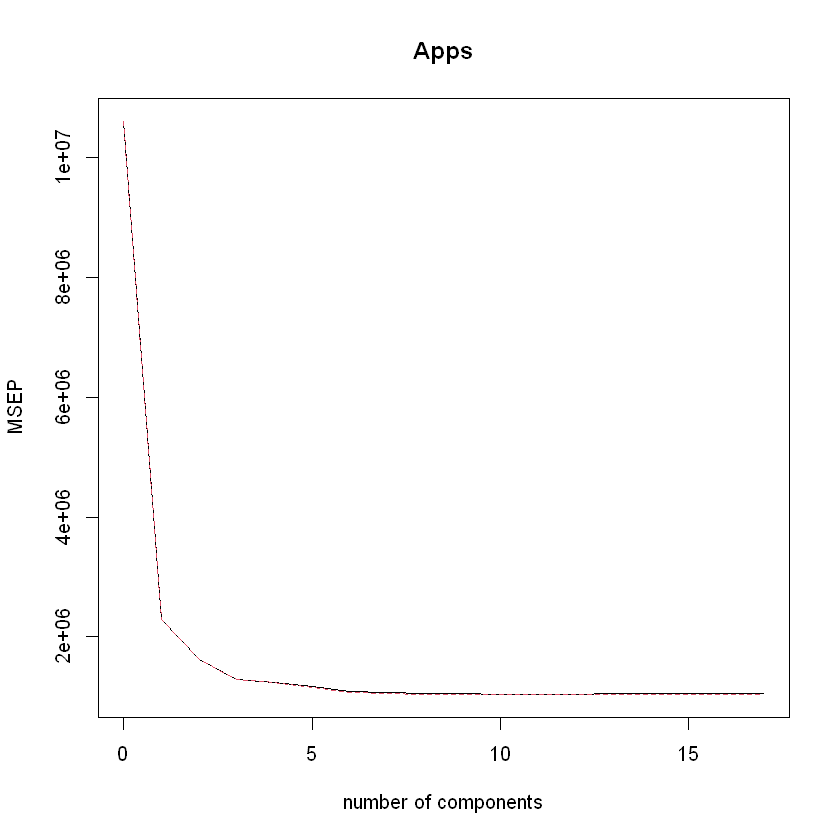

In [152]:
#part f
model_pls <- plsr(Apps ~ ., data=train, scale=TRUE, validation='CV')
validationplot(model_pls, val.type='MSEP')
pred_pls <- predict(model_pls, newdata=test, ncomp=6)
MSE_pls <- mean((pred_pls - test$Apps)^2)
MSE_pls

In [ ]:
#part g
#based on linear regresion we can predict number of application to collage with MSE of 1373995
#the best model is pcr because the MSE is the lowest,

In [ ]:
# Exercise 9 (p.299, Chap.7)

In [179]:
#part a
library(MASS)
lr_cube <- lm(nox ~ poly(dis, d=3), data=Boston)
summary(lr_model_cube)


Call:
lm(formula = nox ~ poly(dis, d = 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, d = 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, d = 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, d = 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


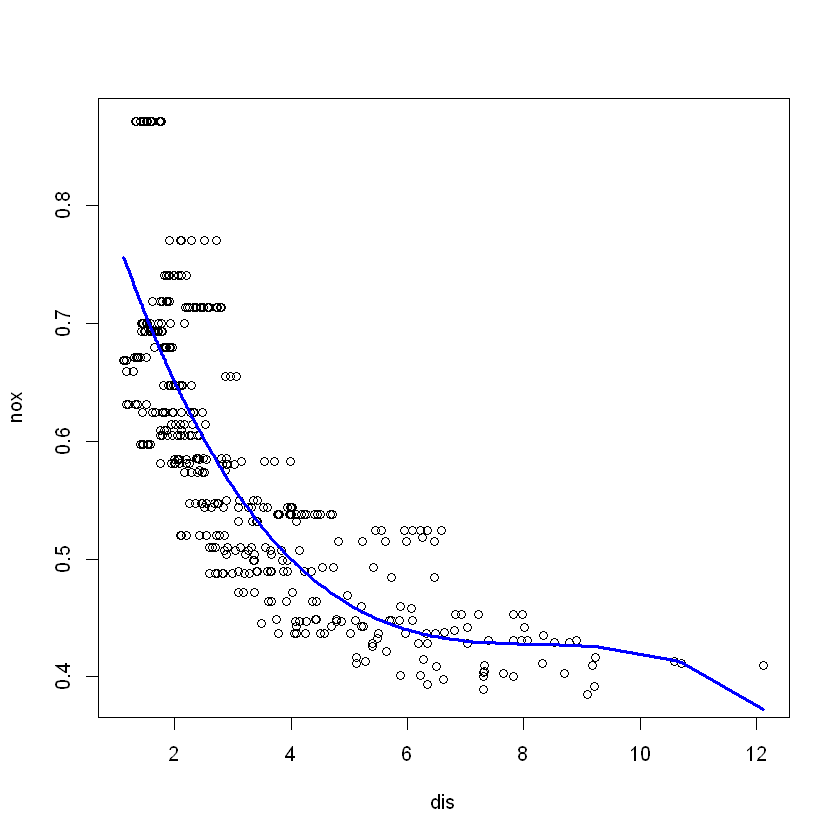

In [180]:
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
lines(sort(Boston$dis), fitted(lr_cube)[order(Boston$dis)], col='blue', type='l',lw=3)

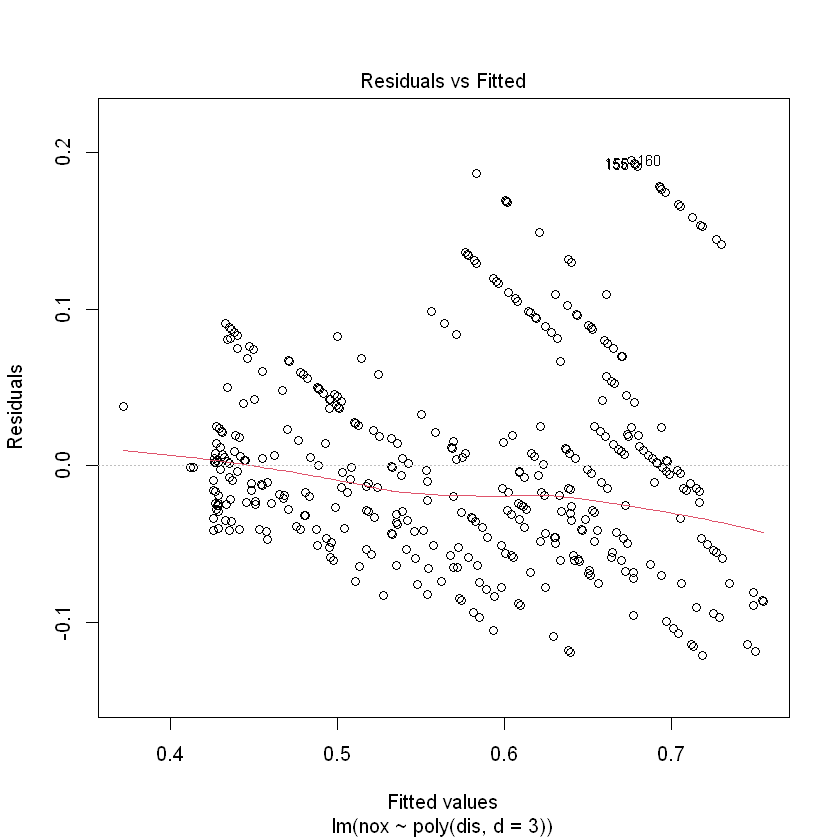

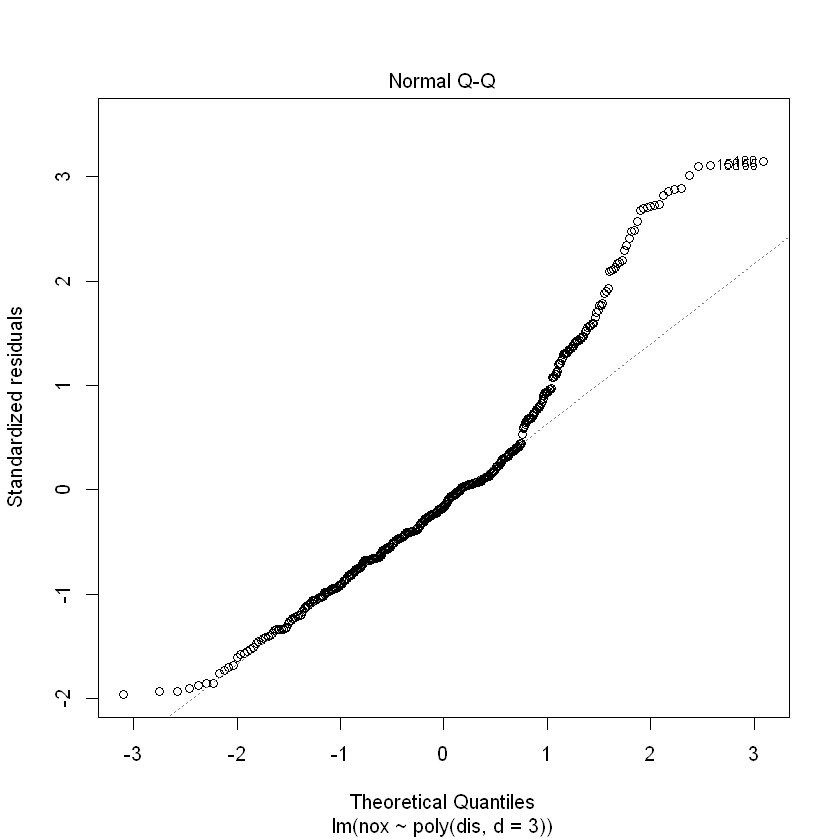

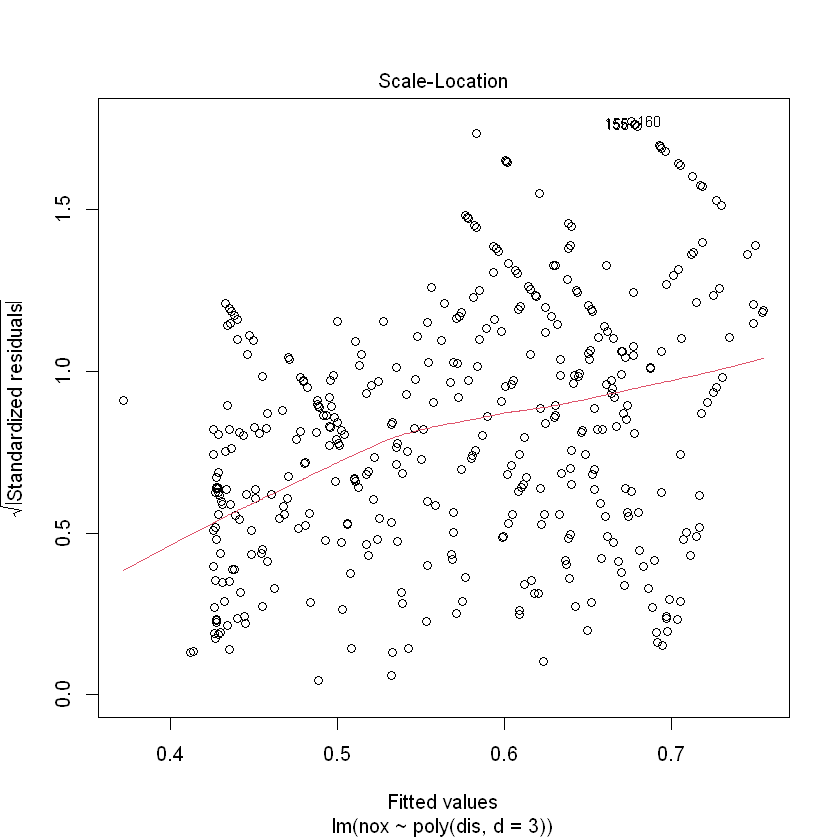

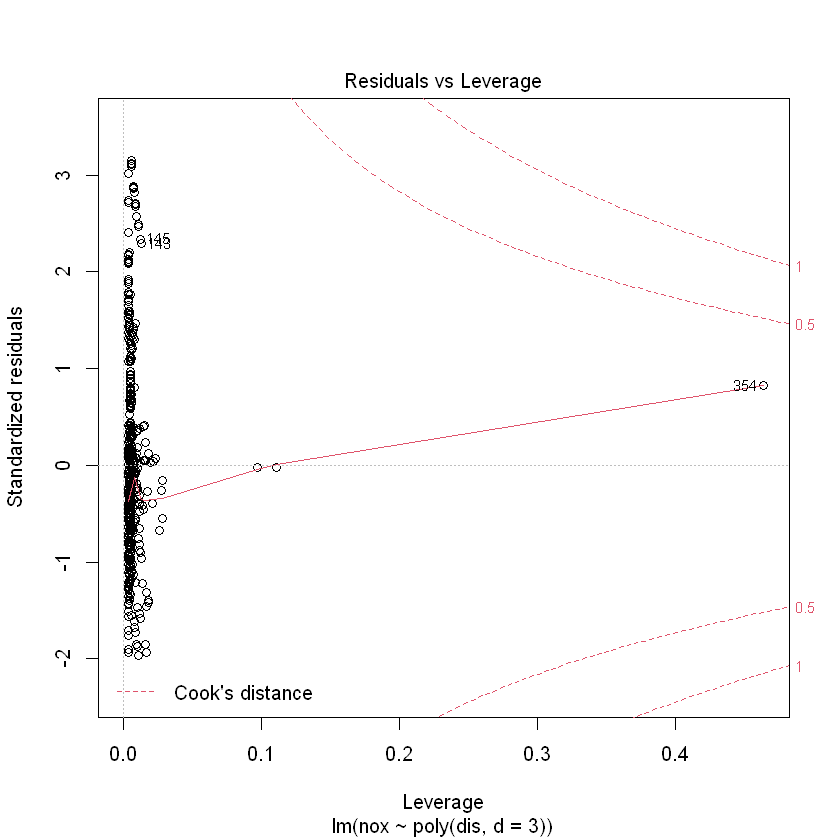

In [181]:
plot(lr_cube)

In [156]:
#part b

rss_results <- NULL
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)
    rss <- sum((predict(LR_for, newdata=Boston) - Boston$nox)^2)
    rss_results$degrees[d] <-  d
    rss_results$RSSs[d] <-  rss
}

rss_results <- data.frame(rss_results)
rss_results

degrees,RSSs
<int>,<dbl>
1,2.768563
2,2.035262
3,1.934107
4,1.932981
5,1.915290
6,1.878257
7,1.849484
8,1.835630
9,1.833331


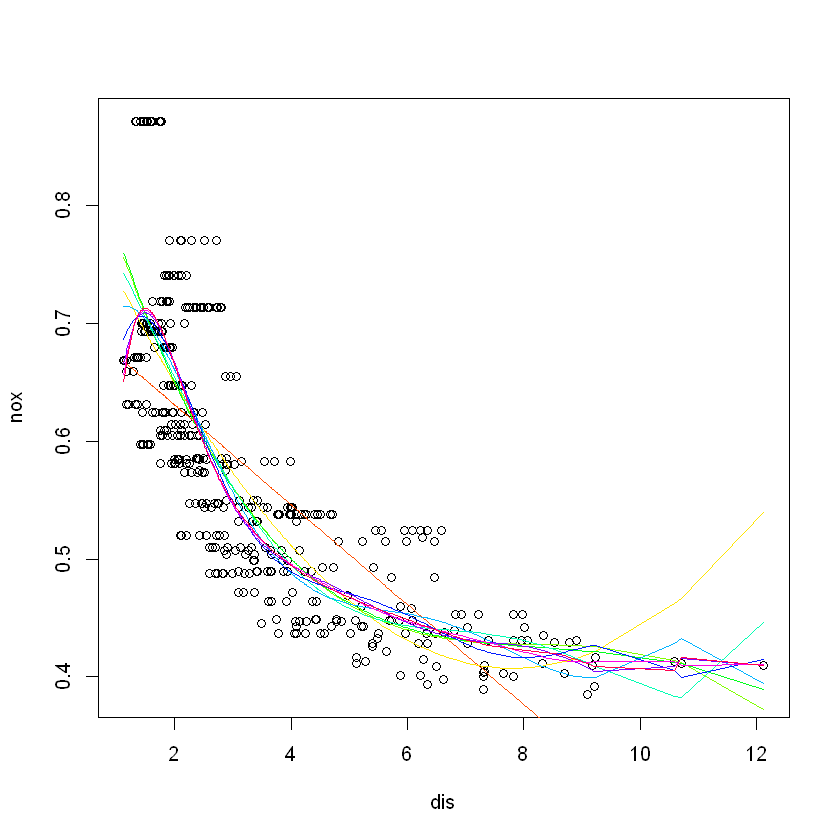

In [157]:
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)    
    lines(sort(Boston$dis), fitted(LR_for)[order(Boston$dis)],
          col=rainbow(20)[d+d], type='l') 
}

In [158]:
#part c
#install.packages('lmvar')
library('lmvar')
cross_validation <- NULL

for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(LR_for, k=5, seed=123)
    cross_validation$Degrees[d] <- d
    cross_validation$MSE[d] <- CV_for$MSE$mean
    
}

cross_validation <- data.frame(cross_validation)
cross_validation

Degrees,MSE
<int>,<dbl>
1,0.005530913
2,0.004075204
3,0.003861502
4,0.003883657
5,0.004081549
6,0.004881712
7,0.007391917
8,0.004582410
9,0.024055149


In [159]:
cross_validation[cross_validation$MSE == min(cross_validation$MSE), ]

,Degrees,MSE
,<int>,<dbl>
3,3,0.003861502



Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


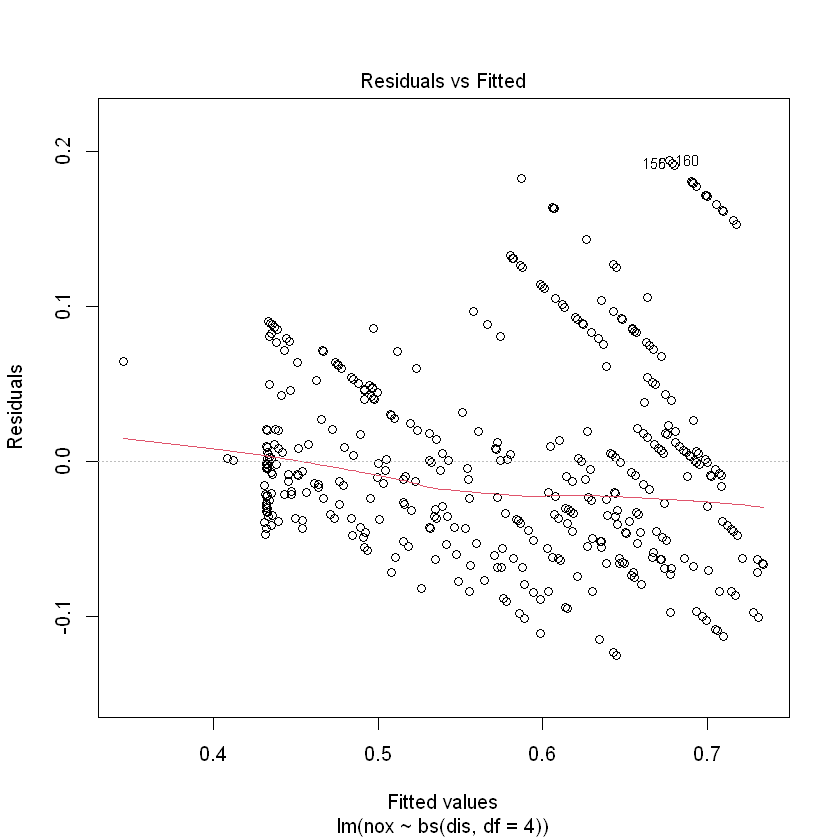

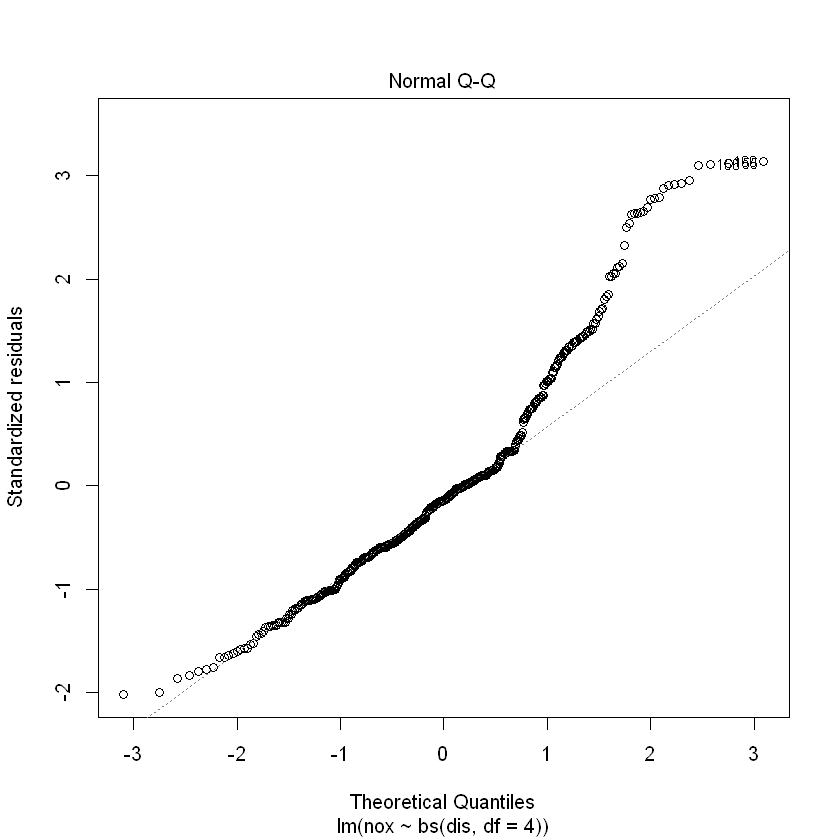

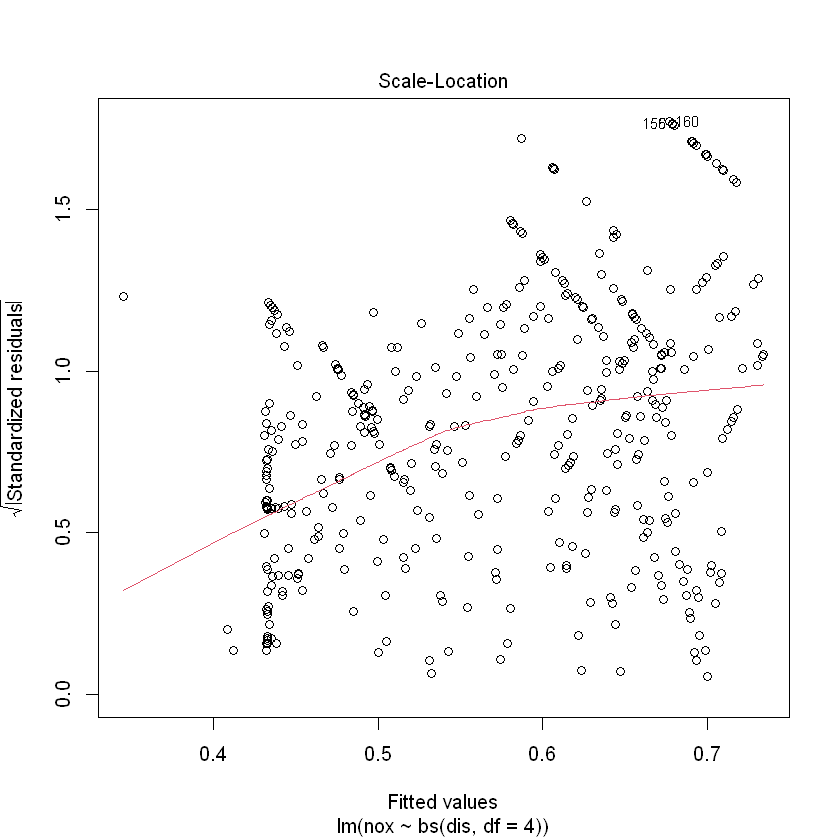

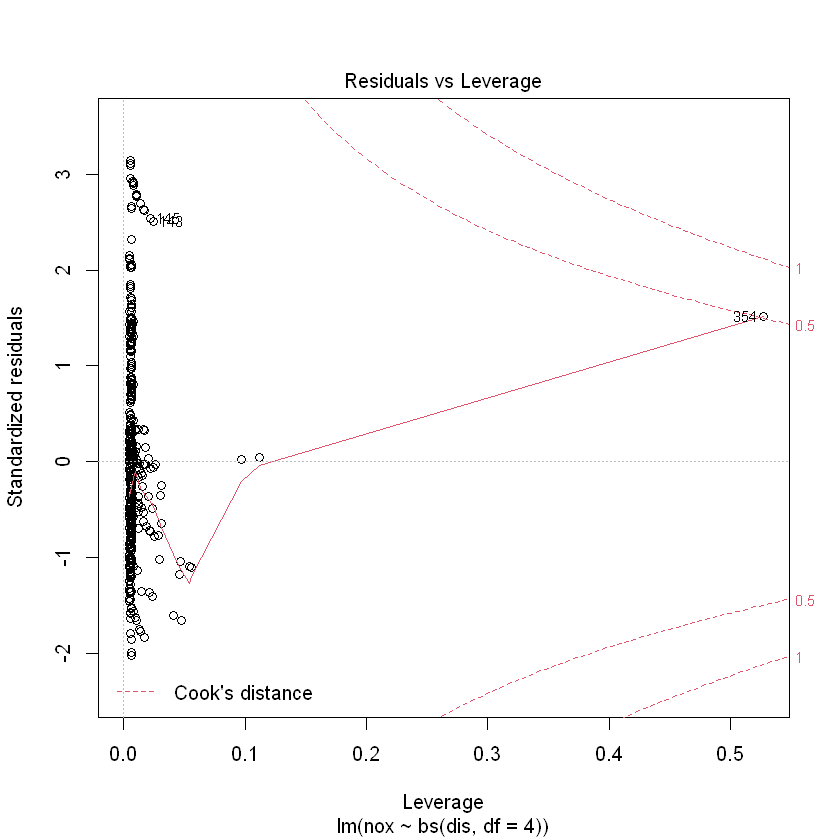

In [160]:
#part d
library(splines)
LR_splines <- lm(nox ~ bs(dis, df=4), data=Boston)
summary(LR_splines)
plot(LR_splines)

In [162]:
Spline_df <- NULL
for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston)
    RSS <- sum((predict(spline_for, newdata=Boston) - Boston$nox)^2)
    Spline_df$Dgrees[d]<-d
    Spline_df$RSS[d] <- RSS
    
}

Spline_df <- data.frame(Spline_df)
head(Spline_df)

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


,Dgrees,RSS
,<int>,<dbl>
1,1,1.934107
2,2,1.934107
3,3,1.934107
4,4,1.922775
5,5,1.840173
6,6,1.833966


In [165]:
#part f

cross_validation_splines <- NULL

for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(spline_for, k=3, seed=123)
    cross_validation_splines$Degrees[d] <- d
    cross_validation_splines$MSE[d] <- CV_for$MSE$mean
    
}

cross_validation_splines <- data.frame(cross_validation_splines)
head(cross_validation_splines)

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


,Degrees,MSE
,<int>,<dbl>
1,1,0.003926306
2,2,0.003926306
3,3,0.003926306
4,4,0.003934043
5,5,0.003742853
6,6,0.003745685


In [166]:
cross_validation_splines[cross_validation_splines$MSE == min(cross_validation_splines$MSE), ]

,Degrees,MSE
,<int>,<dbl>
5,5,0.003742853


In [ ]:
# Exercise 10 (p.300, Chap.7)

In [ ]:
library(ISLR)
str(College)
college$Private <- as.numeric(college$Private=='Yes')

In [ ]:
set.seed(123)
#seting the row indexes
index <- sample(1:nrow(college), round(0.5 * nrow(college), 0))
#spliting data based on the index
train <- college[index, ]
test <- college[-index, ]

In [167]:
str(train)

'data.frame':	388 obs. of  18 variables:
 $ Private    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Apps       : num  1127 516 379 1016 560 ...
 $ Accept     : num  884 392 341 872 454 ...
 $ Enroll     : num  308 154 265 300 113 557 622 282 328 385 ...
 $ Top10perc  : num  30 32 10 27 36 35 20 25 34 44 ...
 $ Top25perc  : num  64 62 36 57 56 68 56 54 73 73 ...
 $ F.Undergrad: num  1310 630 1050 1116 484 ...
 $ P.Undergrad: num  766 549 151 602 16 ...
 $ Outstate   : num  11718 11020 4950 11250 10955 ...
 $ Room.Board : num  7398 4970 2780 4980 3450 ...
 $ Books      : num  450 610 530 550 330 700 450 400 450 400 ...
 $ Personal   : num  1800 1900 1500 1400 670 1300 3160 1200 550 400 ...
 $ PhD        : num  73 73 62 66 62 95 90 73 89 79 ...
 $ Terminal   : num  87 75 62 73 87 95 90 82 93 87 ...
 $ S.F.Ratio  : num  16.4 14 15.7 15.8 10.6 15.8 15.1 14.2 13 15.3 ...
 $ perc.alumni: num  33 36 7 36 31 32 9 32 33 32 ...
 $ Expend     : num  8871 9315 5619 7411 9552 ...
 $ Grad.Rate  : num  76 58 38 

In [168]:
#install.packages('dplyr')
library('dplyr')
selected_columns=colnames(train)
length(selected_columns)-1

[1] 17

In [170]:
#install.packages('leaps')
#forward selection
library(leaps)
set.seed(123)
nvar <- 17

folds <- sample(1:5, nrow(train), replace=TRUE)
cv_mat <- matrix(NA, 5, nvar, dimnames=list(NULL, paste(1:nvar)))

for (j in 1:5) {
    LR_for <- regsubsets(Outstate ∼ ., data=train[folds != j, ], nvmax=17, method='forward')
    for(i in 1:nvar) {
        prediction <- predict(LR_for, train[folds == j, ], id=i)
        cv_mat[j, i] <- mean((train$Outstate[folds == j] - prediction)^2)
    }
}
mean_error <- apply(cv_mat, 2, mean)

In [174]:
plot(mean_error, type='l')
abline(v=10, col='blue', lty=4)

In [175]:
LR_forward <- regsubsets(Outstate ~ ., data=train, nvmax=17, method='forward')
coef_LR_forward<-coef(LR_forward, 10)
coef_LR_forward<-data.frame(coef_LR_forward)
coef_LR_forward

,coef_LR_forward
,<dbl>
(Intercept),-2155.8778329
Private,3061.1503498
Accept,0.5724405
Enroll,-1.3130825
Top25perc,16.1356242
Room.Board,0.5417038
Personal,-0.3678476
Terminal,37.4214386
perc.alumni,42.5761978


In [176]:
forward_selection<-rownames(coef_LR_forward)
forward_selection<-forward_selection[2:length(forward_selection)]
forward_selection

[1] "Private"     "Accept"      "Enroll"      "Top25perc"   "Room.Board" 
 [6] "Personal"    "Terminal"    "perc.alumni" "Expend"      "Grad.Rate"

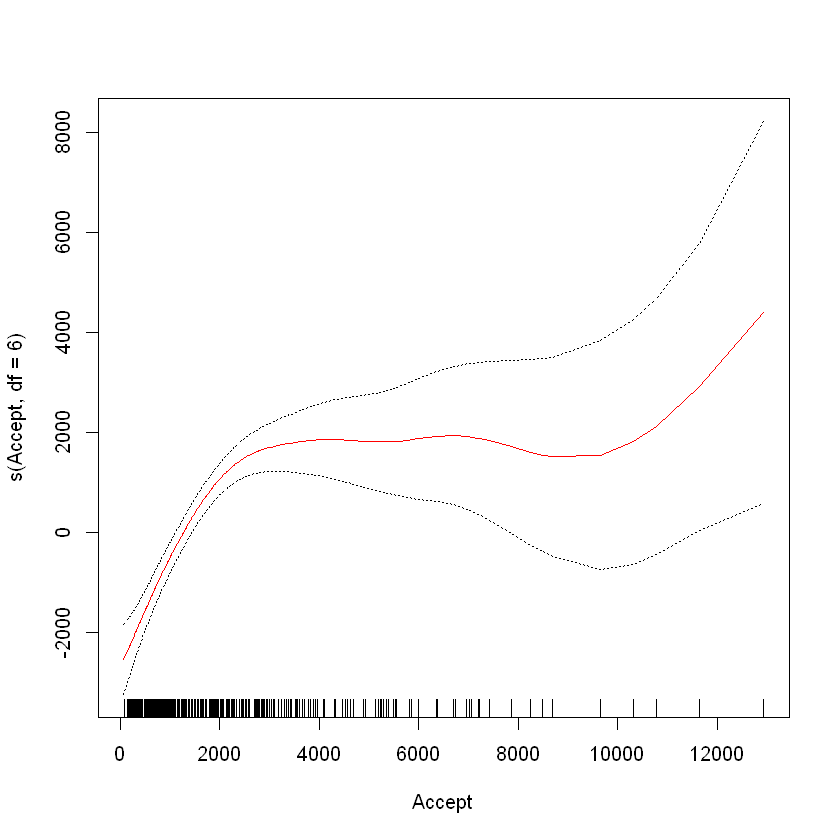

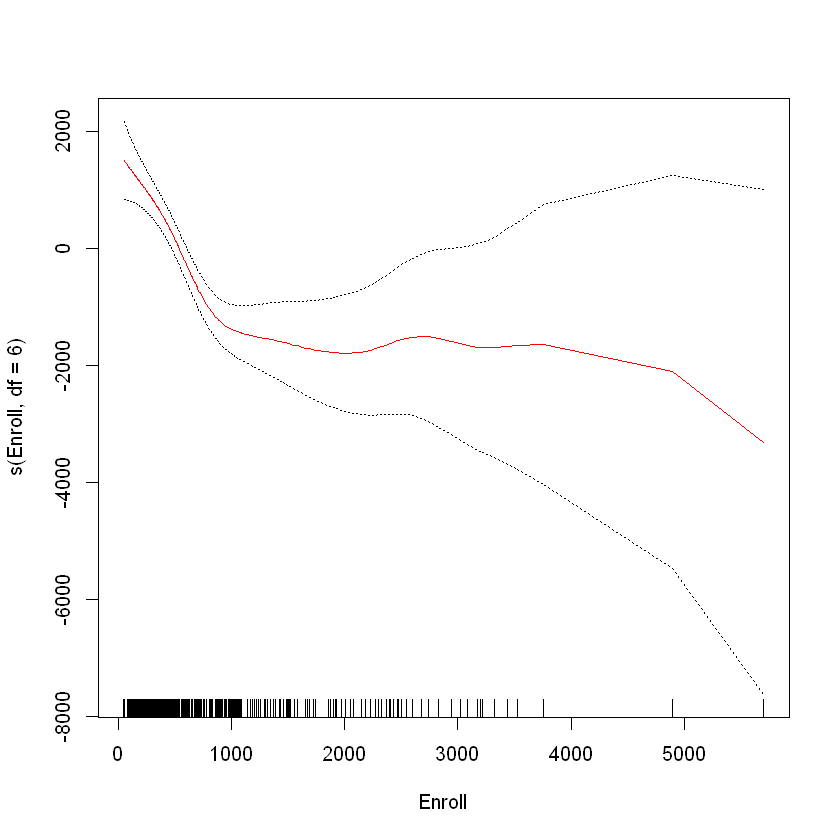

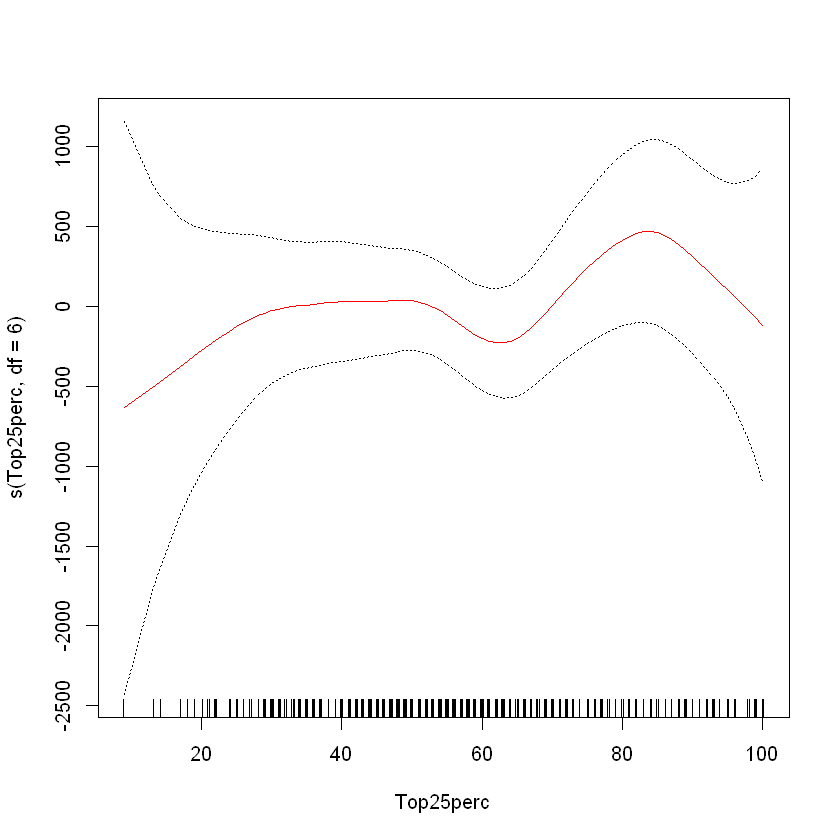

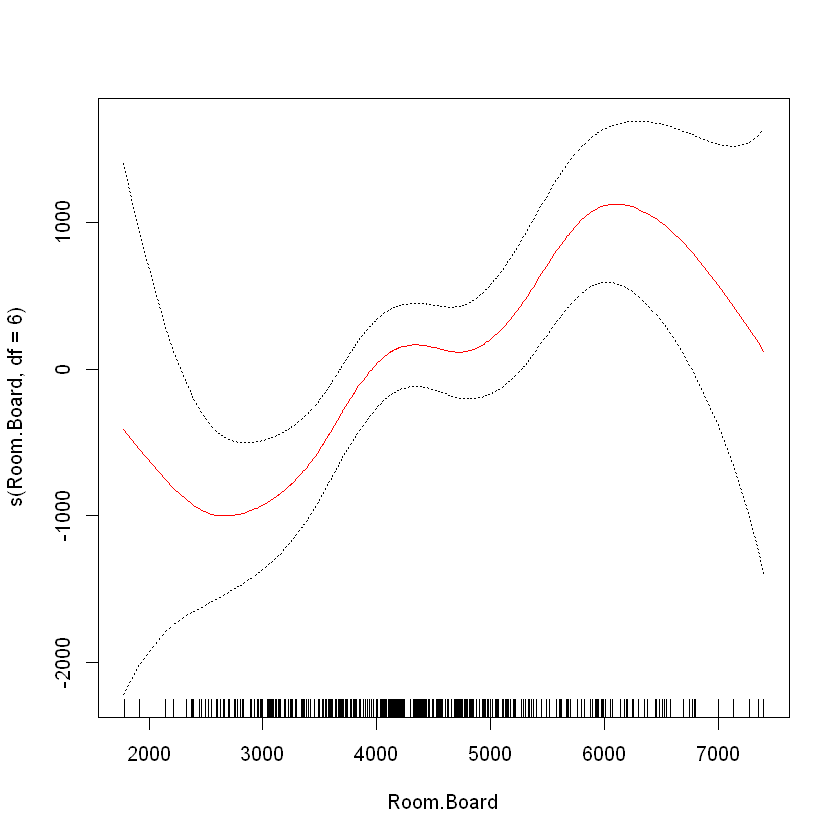

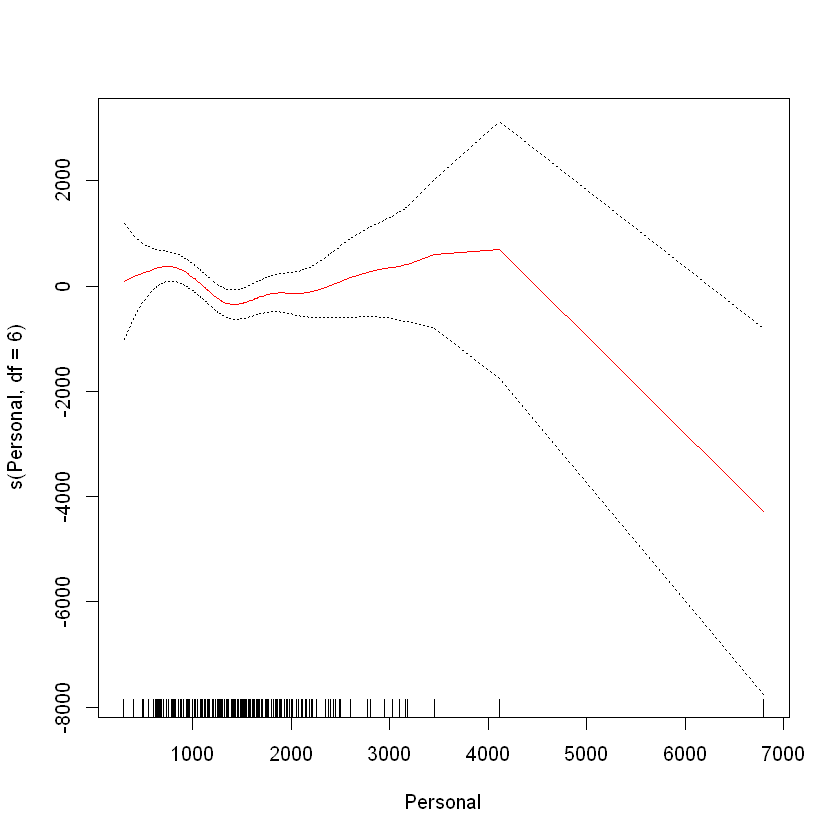

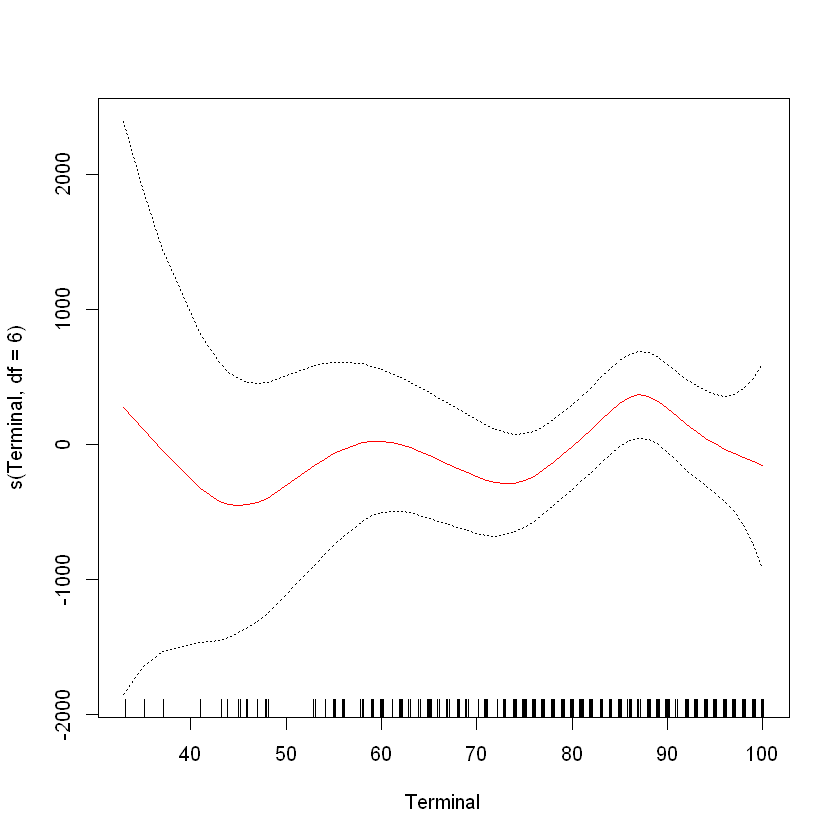

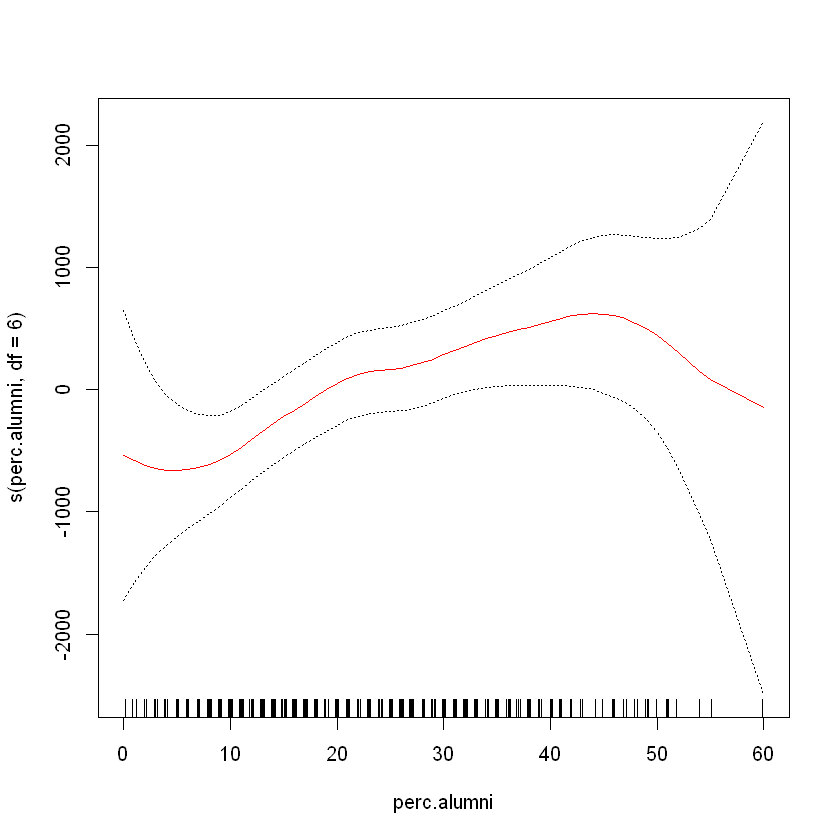

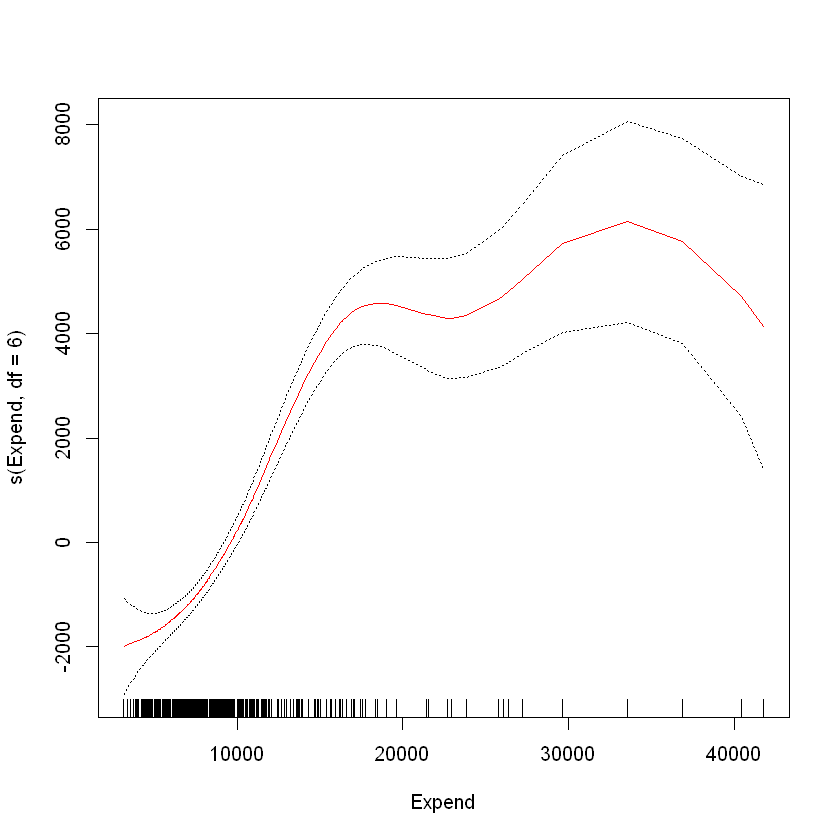

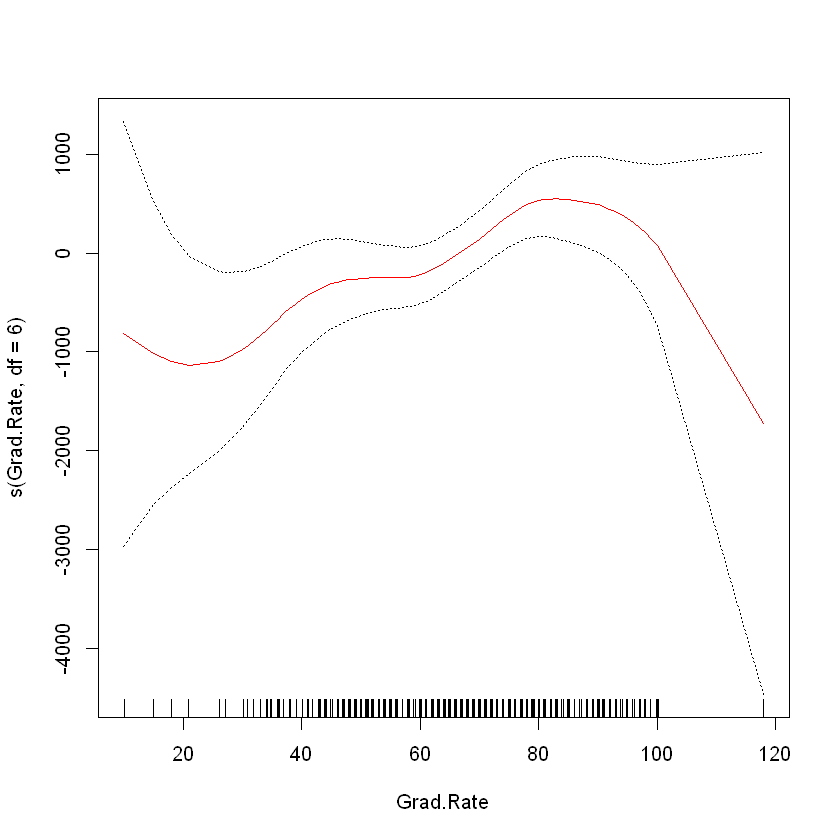

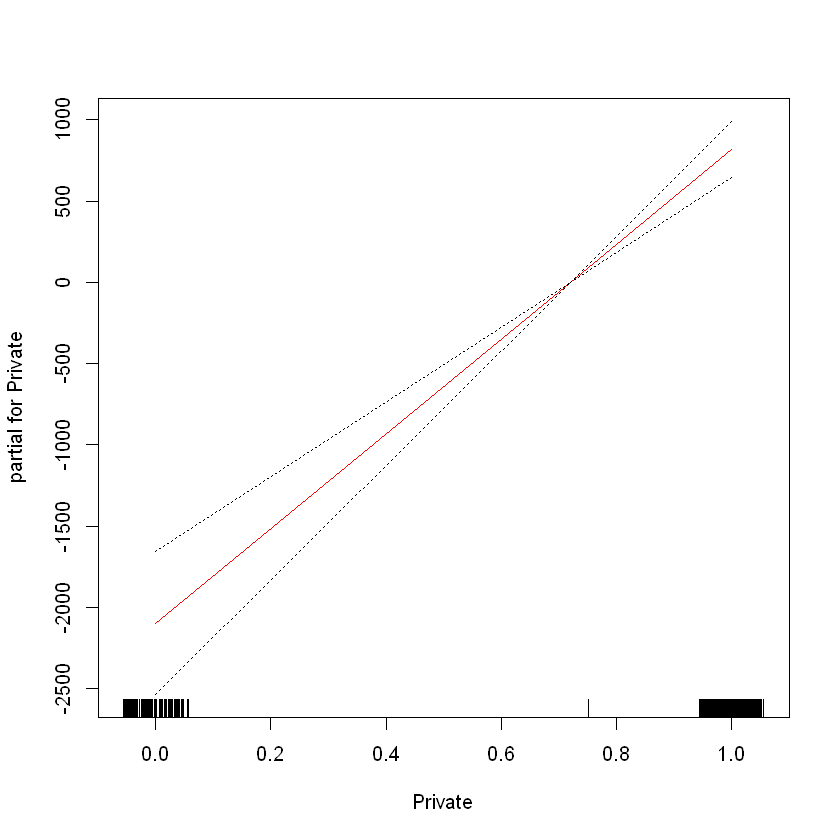

In [177]:
#install.packages('gam')
library(gam) 
GAM <- gam(Outstate ~ s(Accept, df=6) + s(Enroll, df=6) + s(Top25perc, df=6) +
                             s(Room.Board, df=6) + s(Personal, df=6) + s(Terminal, df=6) +
                             s(perc.alumni, df=6) + s(Expend, df=6) + s(Grad.Rate, df=6) +
                             Private,
                 data=train[, c(forward_selection, 'Outstate')])
plot(GAM, se=TRUE, col='red')